In [1]:
import numpy as np
import pandas as pd

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a276caa784fa41c78fb78fbda2467dd9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Iz_caHfGP0g1mIyfNvYfjQwwNpgxlKWo7hS6ddpVGiLn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_a276caa784fa41c78fb78fbda2467dd9.get_object(Bucket='tripbasedmodelingoffuelconsumptio-donotdelete-pr-qtmknlsveygdbc',Key='14.Fleet vechiles.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.6,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
print(df.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.6            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


<AxesSubplot:>

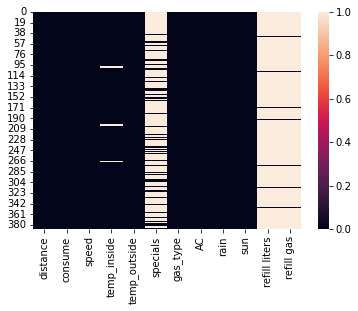

In [4]:
import seaborn as sns
sns.heatmap(df.isnull())


<AxesSubplot:>

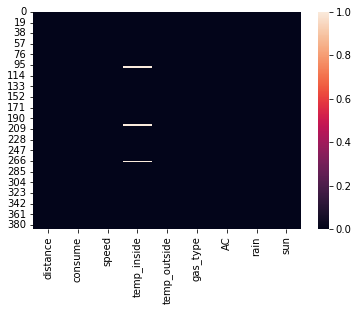

In [5]:
df.drop(['refill gas','refill liters','specials'],axis=1 ,inplace=True)
sns.heatmap(df.isnull())

In [6]:
temp_inside_mean = np.mean(df['temp_inside'])
print(temp_inside_mean)

21.920079787234044


In [7]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

<AxesSubplot:>

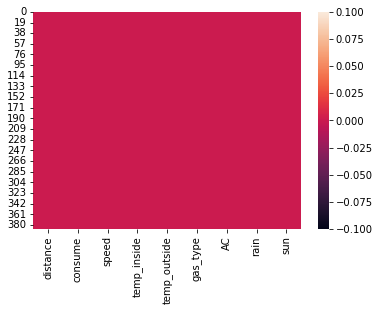

In [8]:
sns.heatmap(df.isnull())

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
x = df.drop(['consume','gas_type'],axis=1)

In [11]:
y = df['consume']

In [12]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [13]:
x = x.values
y = y.values

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.05,random_state=0)

In [15]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [16]:
X_train.shape

(368, 7)

In [17]:
y_pred = lin_reg.predict(X_test)

In [18]:
print(lin_reg.coef_,lin_reg.intercept_)

[ 0.00201577 -0.0166285  -0.08135676 -0.04154168  0.50609297  0.51611445
 -0.12624522] 7.731165794306919


In [19]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,y_pred))
print(metrics.mean_absolute_error(Y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

1.1134833529452768
0.7791795082117128
1.0552172065244563


In [20]:
dum1 = pd.get_dummies(df['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [21]:
df = pd.concat([df,dum1],axis=1)

In [22]:
df.drop('gas_type',axis=1,inplace=True)

In [23]:
x1 = df.drop('consume',axis=1)

In [24]:
y1 = df['consume']

In [25]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [26]:
x1 = x1.values
y1 = y1.values

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [28]:
lin.fit(x_train,y_train)

LinearRegression()

In [29]:
!pip install ibm_watson_machine_learning

In [30]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"QPrWDn2BZ7ubYvtx8nmiJ5LzmROuv-wxHLOl-WatJZmG"
                  }
client = APIClient(wml_credentials)

In [31]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]== space_name)['metadata']['id'])

In [32]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = "+ space_uid)

Space UID = 4d36f325-2bd3-4bd2-abed-bc569a4756a2


In [33]:
client.set.default_space(space_uid)

'SUCCESS'

In [34]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [35]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [43]:
 model_details = client.repository.store_model(model=lin,meta_props={
 client.repository.ModelMetaNames.NAME:"Trip_Based_Modeling_Fuel_Consumption",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                          )
model_id = client.repository.get_model_id(model_details)

In [44]:
model_id

'914bcf78-be82-43b9-90c0-2f03f6f219aa'

In [45]:
y_pred_1 = lin.predict(x_test)
print(y_pred_1)

[4.79710665 5.24804194 5.1540324  5.23183184 4.53167711 5.98536311
 5.73022071 5.24446663 5.88894237 4.93914485 4.08389315 4.78615763
 6.5558634  4.4914256  5.12694455 5.24266469 5.64838181 5.14677524
 5.4824077  5.35366397 4.14326296 5.300013   4.90894697 5.22285432
 4.88771705 4.75262116 4.55918114 4.27937293 5.05895141 3.91495434
 4.96548458 5.34223604 4.74442053 4.57048319 5.52418004 5.02043316
 4.67422512 4.04391043 5.10470278 6.15113468 4.47121432 5.27156639
 5.37497607 4.4127162  4.70063558 4.39079502 5.0938768  5.19463407
 4.96343316 4.97982489 4.86371459 5.4122496  5.47355339 5.29654983
 4.62353618 4.90350572 6.70355952 5.31514825 4.7378862  4.78985001
 5.49350686 4.91839761 4.5567215  4.80609189 4.36527653 4.72010737
 5.55846344 4.35455527 4.83472705 4.91515548 4.28410704 4.61599586
 5.19142772 4.96505525 5.22076418 4.80123647 5.3202343  5.0964835
 5.36422543 5.144745   5.26677999 5.46538131 4.48393747 5.35461779
 5.71262461 4.42604812 5.53002229 5.74553345 5.15712291 4.57983

In [46]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.8644876672772492


In [47]:
x_train.shape

(271, 9)

In [48]:
x_train[0]

array([12.3 , 62.  , 21.26,  6.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ])

In [50]:
import joblib
joblib.dump(lin_reg,'model.save')

['model.save']